## Introduction

After looking at the different datasets, I decided to use the 'Gender Recognition by Voice' for the assignment. This dataset contains different variables of Frequency’s. 

## Data cleaning

To make sure that the dataset contains realistic values, I opend the dataset and looked at the values. In the dataset there are some values that are out of proportion. These values can be typos or errors with the comma.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df_new = df[["meanfreq", "sd", "median", "Q25", "Q75", "IQR", "skew", "label"]]
df_new.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,male


In [10]:
def above_0.3(x):
    if(x > 0.3): 
        return float('0')
    else: 
        return x
df_new['Q25'] = df_new['Q25'].apply(above_.3)


SyntaxError: invalid syntax (1890598394.py, line 1)

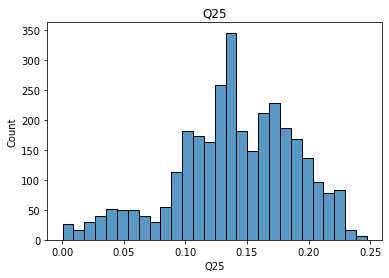

In [11]:
sns.histplot(df_new['Q25'].dropna(), kde=False)
plt.title('Q25')
plt.xlabel("Q25")
plt.show()

## Exploratory data analysis

The median filesize is: 0.18483840942471752 Frequency
The mean filesize is: 0.18090661037084202 Frequency


/Users/garanceschaling/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


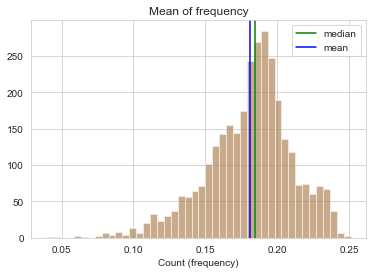

In [15]:
df_new['meanfreq'].name = 'Count (frequency)' #Labeling the variable for plotting
file_size = df_new['meanfreq'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(file_size, kde=False) 

mean_size = df_new['meanfreq'].mean()
median_size = df_new['meanfreq'].median()

print(f'The median filesize is: {median_size} Frequency')
print(f'The mean filesize is: {mean_size} Frequency')

sns.distplot(file_size, kde=False)
plt.title('Mean of frequency')
plt.axvline(median_size, 0, 600, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 600, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

The histrogram has one peak. The mean of the meanfrequency is 0.18. There are no outliers present because they are already removed. The histogram has a right skew, which means that most of the results are on the right side of the histogram.

Text(0, 0.5, 'mean of frequency')

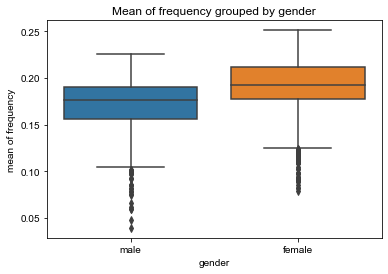

In [14]:
gender = sns.boxplot(x = 'label', y = 'meanfreq', data = df_new)
sns.set_style("whitegrid")
gender.set_title('Mean of frequency grouped by gender')
gender.set_xlabel('gender')
gender.set_ylabel('mean of frequency')

In de boxplot the genders are divided. I chose to do this so you can see how the mean of frequency differs from the genders. As expected the female has on average a higher mean frequency than man.

## Predictive model

In [16]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

In [17]:
df_new['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [18]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df_new[['meanfreq', 'Q25', 'Q75']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df_new['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [19]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.9158780231335436

91% of the genders is predicted accuratly. That is a pretty good score.

In [20]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[420,  37],
       [ 43, 451]])

In [22]:
conf_matrix = pd.DataFrame(cm, index=['male', 'female'], columns = ['male_p', 'female_p']) 
conf_matrix

,male_p,female_p
male,420,37
female,43,451


The way to read this is that of the males, 420 are correctly predicted as 'male', 37 are instead predicted as 'female'. The _recall_ and _precision_ for the category male is:

$recall = \frac{420}{420 + 37} = .92$

$precision = \frac{420}{420 + 43} = .91$

## Conclusion

The outcome of the calculation of the accuracy is quite high. This means that there is a strong relation between the used variables for the prediction of the gender. It doesn't surprise me because if you look at the boxplot previously shown, you can already see some difference between the mean frequency. I expect that if you make a boxplot for the other variables used for the prediction, they will give a similar outcome where you can see that females have for example a higher frequency.